In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [4]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,NaN,92,45.0,27.0,31.0,0.0
1,85.0,64,59.0,32.0,NaN,0.0
2,86.0,54,33.0,16.0,54.0,NaN
3,91.0,78,34.0,24.0,36.0,0.0
4,98.0,55,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91.0,54,25.0,22.0,35.0,4.0
341,89.0,48,32.0,22.0,14.0,4.0
342,85.0,52,22.0,23.0,34.0,4.0
343,95.0,93,21.0,27.0,47.0,6.0


In [5]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	35
int64		column 2	0
float64		column 3	17
float64		column 4	17
float64		column 5	17
float64		column 6	17


In [6]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,310.000000,345.000000,328.000000,328.000000,328.000000,328.000000
mean,90.183871,69.869565,30.045732,24.728659,37.746951,3.463415
std,4.379461,18.347670,19.331038,10.120505,38.833921,3.228581
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,88.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,92.000000,80.000000,33.250000,27.000000,44.000000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

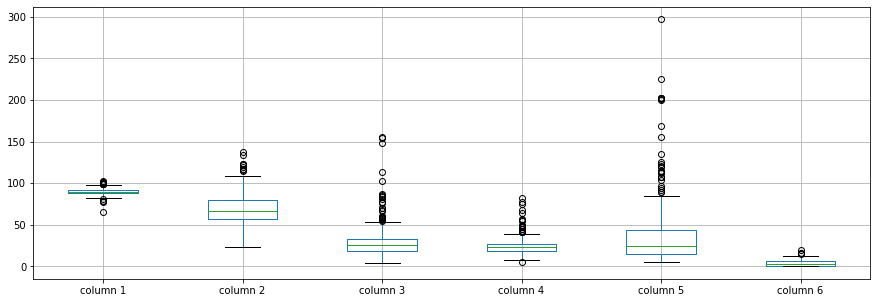

In [7]:
df.boxplot(return_type='axes', figsize=(15,5))

In [8]:
df.mean()

column 1    90.183871
column 2    69.869565
column 3    30.045732
column 4    24.728659
column 5    37.746951
column 6     3.463415
dtype: float64

In [9]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.040581,0.166967,0.200182,0.217113,0.300762
column 2,0.040581,1.000000,0.059702,0.153115,0.150486,0.111835
column 3,0.166967,0.059702,1.000000,0.734158,0.470907,0.190343
column 4,0.200182,0.153115,0.734158,1.000000,0.513036,0.264434
column 5,0.217113,0.150486,0.470907,0.513036,1.000000,0.316281
column 6,0.300762,0.111835,0.190343,0.264434,0.316281,1.000000


In [10]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [11]:
imputer = md.Midas(layer_structure = [6,6+18,6+18+18,6+18+18+18,6+18+18+18+18,6+18+18+18,6+18+18,6+18,6], vae_layer = False, seed = 180)
imputer.build_model(df)
imputer.train_model(training_epochs=18)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 266.036870320638
Epoch: 1 , loss: 262.27440025692897
Epoch: 2 , loss: 263.32294209798175
Epoch: 3 , loss: 264.9546690441313
Epoch: 4 , loss: 263.0902353922526
Epoch: 5 , loss: 264.91214643205916
Epoch: 6 , loss: 264.06612359909786
Epoch: 7 , loss: 265.2339651925223
Epoch: 8 , loss: 266.14803277878536
Epoch: 9 , loss: 264.20898001534596
Epoch: 10 , loss: 265.09148951939176
Epoch: 11 , loss: 265.1321854364304
Epoch: 12 , loss: 263.8538382393973
Epoch: 13 , loss: 264.6920362200056
Epoch: 14 , loss: 263.8365936279297
Epoch: 15 , loss: 261.2711152576265
Epoch: 16 , loss: 264.0011204310826
Epoch: 17 , loss: 264.2386743454706
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [12]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [13]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [14]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [15]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,-84.96481,0,0.0,0.0,0.000000,0.000000
1,0.00000,0,0.0,0.0,-22.966006,0.000000
2,0.00000,0,0.0,0.0,0.000000,0.033177
3,0.00000,0,0.0,0.0,0.000000,0.000000
4,0.00000,0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...
340,0.00000,0,0.0,0.0,0.000000,0.000000
341,0.00000,0,0.0,0.0,0.000000,0.000000
342,0.00000,0,0.0,0.0,0.000000,0.000000
343,0.00000,0,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [16]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [17]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [18]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

633.580177027545

In [19]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [20]:
NRMS=numerator/denominator
NRMS


0.25144444352626855

In [21]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [22]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,0.03519,92,45.0,27.0,31.000000,0.000000
1,85.00000,64,59.0,32.0,0.033994,0.000000
2,86.00000,54,33.0,16.0,54.000000,0.033177
3,91.00000,78,34.0,24.0,36.000000,0.000000
4,98.00000,55,13.0,17.0,17.000000,0.000000
...,...,...,...,...,...,...
340,91.00000,54,25.0,22.0,35.000000,4.000000
341,89.00000,48,32.0,22.0,14.000000,4.000000
342,85.00000,52,22.0,23.0,34.000000,4.000000
343,95.00000,93,21.0,27.0,47.000000,6.000000


In [23]:
imputations[-1].to_excel("Bupa_NE_5(imp).xlsx", index=False, header=False)